# Umiverse Machine mass functions


* SMF of the new UM when considering in-situ, ex-situ, and the sum of both compared to Songs SMF
* look at the scatter in M* and Mhalo
- for in-situ
- for in-situ + ex-situ
- for N most massive galaxies

In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Local libs
import plots
import cluster_sum
from importlib import reload # for when I mess up local libs

In [2]:
datadir = "/home/christopher/data/universe_machine/"
catalog_file = "sfr_catalog_insitu_exsitu_0.712400_final.npz"

catalog = np.load(datadir + catalog_file)
centrals = catalog["centrals"]
satellites = catalog["satellites"]

# Our data

Let's get a very broad sense of our data

In [3]:
print(centrals.dtype)
print(len(centrals))
print(len(satellites))

[('ID', '<i8'), ('uparent_ID', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('mp', '<f8'), ('sm', '<f8'), ('icl', '<f8'), ('sfr', '<f8')]
385125
10809469


385117 centrals without ICL of our 385125 samples


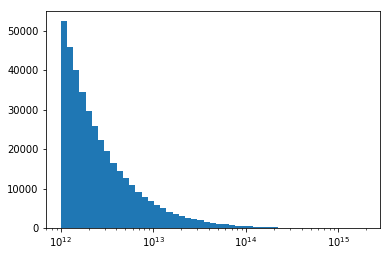

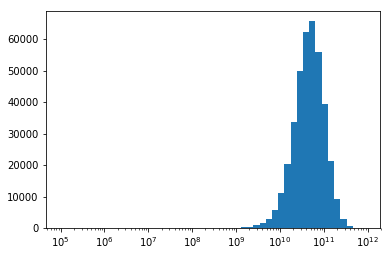

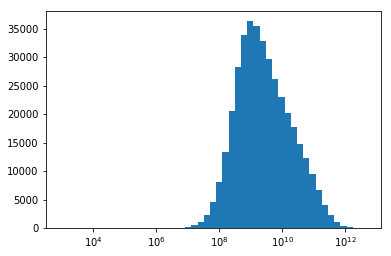

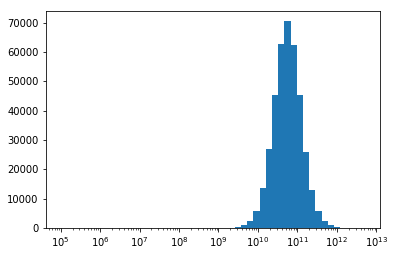

In [4]:
fig, ax = plt.subplots()
_ = ax.hist(centrals["mp"], bins = np.geomspace(np.amin(centrals["mp"]), np.amax(centrals["mp"]), 50))
_ = ax.set(xscale="log")

fig, ax = plt.subplots()
_ = ax.hist(centrals["sm"], bins = np.geomspace(np.amin(centrals["sm"]), np.amax(centrals["sm"]), 50))
_ = ax.set(xscale="log")

fcentrals = centrals[np.nonzero(centrals["icl"])[0]]
fig, ax = plt.subplots()
_ = ax.hist(fcentrals["icl"], bins = np.geomspace(np.amin(fcentrals["icl"]), np.amax(fcentrals["icl"]), 50))
_ = ax.set(xscale="log")
print(
    "{} centrals without ICL of our {} samples".format(len(np.nonzero(centrals["icl"])[0]), len(centrals))
)

fig, ax = plt.subplots()
_ = ax.hist(
    centrals["icl"] + centrals["sm"],
    bins = np.geomspace(
        np.amin(centrals["icl"]) + np.amin(centrals["sm"]),
        np.amax(centrals["icl"]) + np.amax(centrals["sm"]),
        50))
_ = ax.set(xscale="log")

# SMHM relations

Now let's plot the SM, halo mass relations for centrals

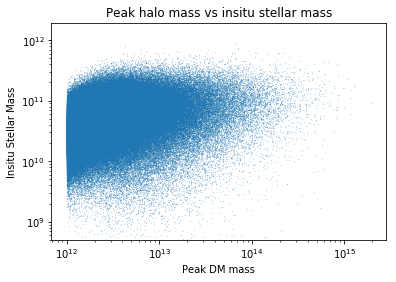

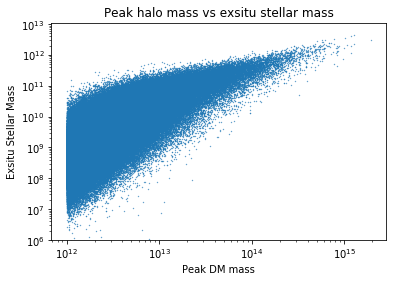

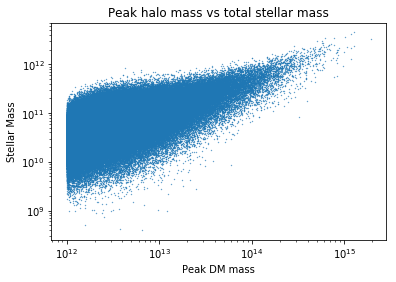

In [5]:
ax = plots.dm_vs_insitu(centrals)
ax.set(ylim=5e8) # ignore crazy small galaxies

ax = plots.dm_vs_exsitu(centrals)
ax.set(ylim=1e6) # not sure why by default it ignores a bunch of data

plots.dm_vs_all_sm(centrals)

# SMHM for cluster

What happens if we start to plot this relation for multiple members of the cluster?

In [6]:
reload(cluster_sum)
fullData = np.array(
    [centrals] + 
    [cluster_sum.centrals_with_satellites(centrals, satellites, i) for i in range(1, 10)]
)

TypeError: slice indices must be integers or None or have an __index__ method

In [7]:
fullData[0][:10]["sm"] - fullData[1][:10]["sm"] # sanity check that this is actually doing the right thing

array([  0.00000000e+00,  -2.31400000e+05,  -1.15200000e+03,
        -2.13099670e+00,  -2.12300003e+02,  -5.18700000e+03,
        -6.41000000e+02,  -2.21900000e+05,  -9.28500000e+05,
        -2.57100067e+01])

[  0.51071921  10.12750596]
[  0.51294969  10.05987656]


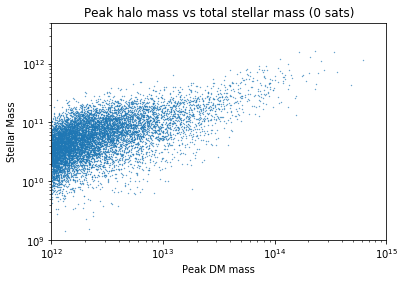

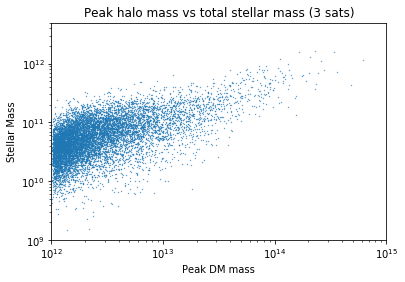

In [9]:
reload(plots)
np.random.seed(2) # reproducibility
mask = np.unique(np.random.randint(0, fullData.shape[1], 10000)) # Do this so graph isn't totally saturated
data = fullData[:,mask]

ax = plots.dm_vs_all_sm(data[0])
ax.set(xlim=[1e12, 1e15], ylim=[1e9, 5e12], title="Peak halo mass vs total stellar mass ({} sats)".format(0))
print(np.polyfit(np.log(data[0]["mp"]), np.log(data[0]["icl"] + data[0]["sm"]), 1))

ax = plots.dm_vs_all_sm(data[3])
ax.set(xlim=[1e12, 1e15], ylim=[1e9, 5e12], title="Peak halo mass vs total stellar mass ({} sats)".format(3))
print(np.polyfit(np.log(data[3]["mp"]), np.log(data[3]["icl"] + data[3]["sm"]), 1))

[ 0.72249904  4.16603722]


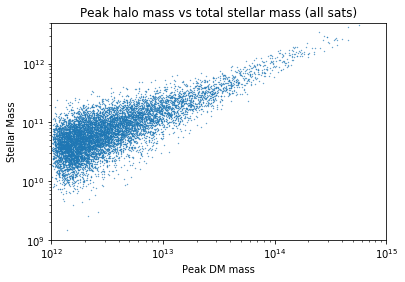

In [11]:
reload(cluster_sum)
allSats = cluster_sum.centrals_with_satellites(centrals, satellites, 0.999)
allSats = allSats[mask]
ax = plots.dm_vs_all_sm(allSats)
ax.set(xlim=[1e12, 1e15], ylim=[1e9, 5e12], title="Peak halo mass vs total stellar mass ({} sats)".format("all"))
print(np.polyfit(np.log(allSats["mp"]), np.log(allSats["icl"] + allSats["sm"]), 1))

# Plotly

Let's see if we can make some interactive plots that illustrate this better

In [ ]:
# Downsample to ~ 1000 random points
np.random.seed(2) # reproducibility
mask = np.unique(np.random.randint(0, fullData.shape[1], 2000))
data = fullData[:,mask]

In [ ]:
reload(plots)
fig = plots.plotly_stuff(data, y_cols = ["icl", "sm"])
py.iplot(fig, filename='basic-scatter')